In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib .pyplot as  plt

In [4]:
import seaborn as sns

In [5]:
%matplotlib inline

In [7]:
np.random.seed(42)

In [15]:
employee_ids = [f"E{str(i).zfill(3)}" for i in range(1, 31)]


In [16]:
dates=pd.date_range(start="2025-06-01",periods=30)

In [17]:
data = []
for emp in employee_ids:
    for date in dates:
        hours = np.round(np.random.uniform(4, 10), 2)  # 4 to 10 hours
        data.append([emp, date, hours])



In [18]:
df=pd.DataFrame(data,columns=["EmployeeID","Date","Working Hours"])

In [19]:
print("Head of the dataset")
display(df.head())

Head of the dataset


,EmployeeID,Date,Working Hours
0,E001,2025-06-01,6.25
1,E001,2025-06-02,9.70
2,E001,2025-06-03,8.39
3,E001,2025-06-04,7.59
4,E001,2025-06-05,4.94


In [21]:
print("\nSummary statistics:")
display(df.describe())


Summary statistics:


,Date,Working Hours
count,900,900.000000
mean,2025-06-15 12:00:00.000000256,6.954233
min,2025-06-01 00:00:00,4.030000
25%,2025-06-08 00:00:00,5.387500
50%,2025-06-15 12:00:00,7.010000
75%,2025-06-23 00:00:00,8.490000
max,2025-06-30 00:00:00,10.000000
std,NaN,1.762088


In [24]:
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
EmployeeID       0
Date             0
Working Hours    0
dtype: int64


In [26]:
print(df.columns.tolist())

['EmployeeID', 'Date', 'Working Hours']


In [28]:
grouped = df.groupby("EmployeeID")["Working Hours"].agg(["sum", "mean", "max", "min"]).reset_index()
grouped.columns = ["EmployeeID", "TotalHours", "AverageHours", "MaxHours", "MinHours"]
display(grouped)

,EmployeeID,TotalHours,AverageHours,MaxHours,MinHours
0,E001,198.96,6.632000,9.82,4.12
1,E002,209.37,6.979000,9.82,4.21
2,E003,206.79,6.893000,9.92,4.03
3,E004,208.46,6.948667,9.58,4.15
4,E005,202.07,6.735667,9.83,4.04
5,E006,204.29,6.809667,9.91,4.10
6,E007,210.91,7.030333,9.55,4.03
7,E008,210.81,7.027000,9.84,4.15
8,E009,228.84,7.628000,9.94,4.09
9,E010,210.88,7.029333,9.48,4.18


In [29]:
mean_avg=grouped["AverageHours"].mean()

In [30]:
std_avg=grouped["AverageHours"].std()

In [31]:
anomalies = grouped[(grouped["AverageHours"] > mean_avg + 2*std_avg) |
                    (grouped["AverageHours"] < mean_avg - 2*std_avg)]


In [32]:
print("\nAnomalous employees based on average working hours:")
display(anomalies)




Anomalous employees based on average working hours:


,EmployeeID,TotalHours,AverageHours,MaxHours,MinHours
8,E009,228.84,7.628,9.94,4.09


C:\Users\DHARANISH 7\AppData\Local\Temp\ipykernel_7692\2383440368.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="EmployeeID", y="TotalHours", palette="viridis")


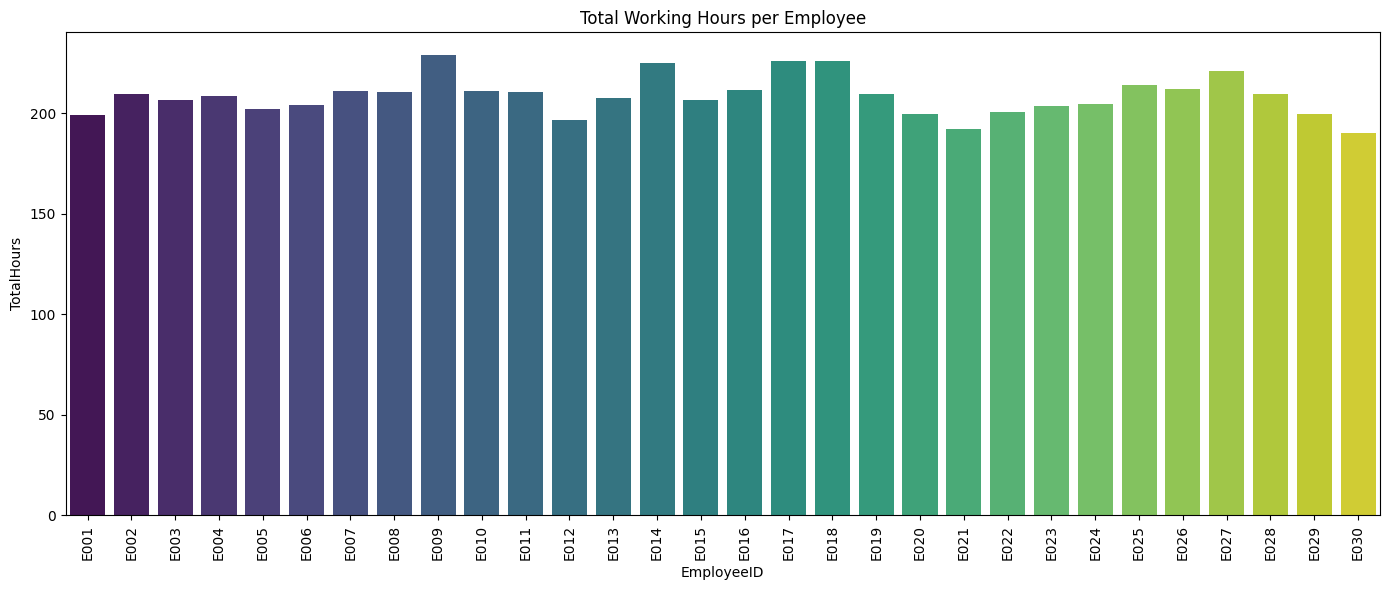

In [33]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="EmployeeID", y="TotalHours", palette="viridis")
plt.title("Total Working Hours per Employee")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


C:\Users\DHARANISH 7\AppData\Local\Temp\ipykernel_7692\3481631896.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=grouped, x="EmployeeID", y="AverageHours", palette="coolwarm")


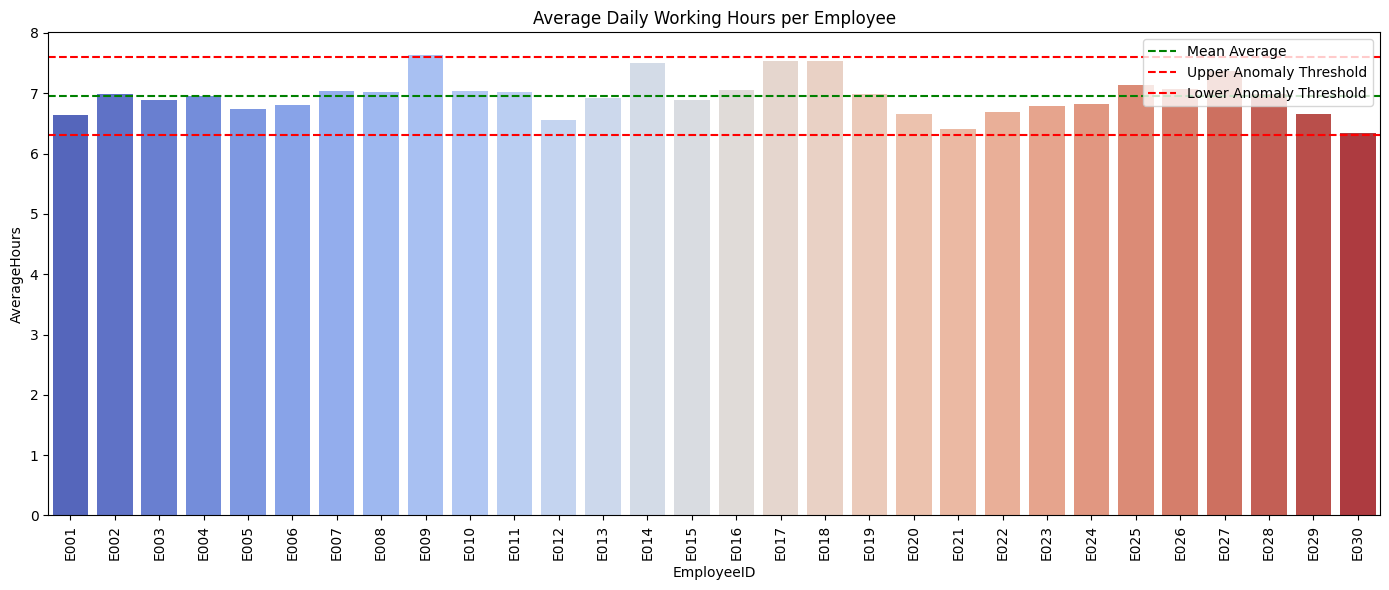

In [34]:
plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x="EmployeeID", y="AverageHours", palette="coolwarm")
plt.title("Average Daily Working Hours per Employee")
plt.xticks(rotation=90)
plt.axhline(mean_avg, color='green', linestyle='--', label='Mean Average')
plt.axhline(mean_avg + 2*std_avg, color='red', linestyle='--', label='Upper Anomaly Threshold')
plt.axhline(mean_avg - 2*std_avg, color='red', linestyle='--', label='Lower Anomaly Threshold')
plt.legend()
plt.tight_layout()
plt.show()
